# The Blizzard case : Data Analysis from reddit subreddit. 

##### NB : the Blizzard crisis occured on the 7/10/2019

### Loading the methods and the data base

In [1]:
from utils.Dates_data_methods import *
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# general database
data = pd.read_csv('data/blizz_case_db.csv')
data = pd.DataFrame(data=data,dtype=object)
data["datetime"] = pd.to_datetime(data["datetime"])  
data["date"] = pd.to_datetime(data["date"])  
data['selftext'] = data['selftext'].replace(np.nan, '')
data

,id,full_link,created,num_comments,selftext,title,score,datetime,date,title_score,text_score
0,bja2pm,https://www.reddit.com/r/Blizzard/comments/bja...,1556665690,0,,Warcraft 3 - VS PITLORD,1,2019-05-01 01:08:10,2019-05-01,0.275851,-1
1,bjarr3,https://www.reddit.com/r/Blizzard/comments/bja...,1556669743,3,👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌👌...,Take this blizzard!,0,2019-05-01 02:15:43,2019-05-01,0.0545609,0.752674
2,bjh1as,https://www.reddit.com/r/Blizzard/comments/bjh...,1556717084,2,[removed],Blizzard is telling me my password is wrong an...,1,2019-05-01 15:24:44,2019-05-01,0.0184228,-1
3,bjj2fj,https://www.reddit.com/r/Blizzard/comments/bjj...,1556727706,9,I've recently found an old CD of Warcraft 3 an...,I've recently got warcraft 3,8,2019-05-01 18:21:46,2019-05-01,0.253792,0.205299
4,bjl09s,https://www.reddit.com/r/Blizzard/comments/bjl...,1556737149,1,,What are Mind Control Buffs? - WoW Tricks,21,2019-05-01 20:59:09,2019-05-01,0.5,-1
...,...,...,...,...,...,...,...,...,...,...,...
14022,exn0nv,https://www.reddit.com/r/Blizzard/comments/exn...,1580641944,2,,"""An issue with the website"", suuure",1,2020-02-02 12:12:24,2020-02-02,0.0858483,-1
14023,exn58f,https://www.reddit.com/r/Blizzard/comments/exn...,1580642763,0,,BLizz(CON!!) 2018 VS 2020 - Warcraft III Refun...,1,2020-02-02 12:26:03,2020-02-02,0.800249,-1
14024,exn8ru,https://www.reddit.com/r/Blizzard/comments/exn...,1580643390,2,I just wanted to say that all of you who crawl...,Remember Hong Kong?,1,2020-02-02 12:36:30,2020-02-02,0.5,0.0990213
14025,exnip7,https://www.reddit.com/r/Blizzard/comments/exn...,1580645111,0,"As much as i would like to believe in them, th...",Is Blizzard pulling a Gallius Rax move?,1,2020-02-02 13:05:11,2020-02-02,0.5,0.100901


In [3]:
# near the crisis databases 
date1 = [2019,9,20]
date2 = [2019,10,15]
df_near_cris = get_posts_between(date1,date2,data)

date1 = [2019,10,6]
date2 = [2019,10,15]
df_near_cris2 = get_posts_between(date1,date2,data)

C:\Users\amelie\Desktop\TUM\Cours\S1\Seminar\Clean_repo\HK_Controversies_Reddit\utils\Dates_data_methods.py:63: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  df_bef_cr = df_old_dates[df_old_dates['date'] >= datetime.date(y1, m1, d1)].copy()
C:\Users\amelie\Desktop\TUM\Cours\S1\Seminar\Clean_repo\HK_Controversies_Reddit\utils\Dates_data_methods.py:64: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  df_near_cris = df_bef_cr[df_bef_cr['date'] <= datetime.date(y2, m2, d2)].copy()


In [4]:
#before the crisis database
date1 = [2019,5,15]
date2 = [2019,10,6]
df_bef_cris = get_posts_between(date1,date2,data)

In [5]:
#after the crisis database
date1 = [2019,10,7]
date2 = [2019,10,30]
df_aft_cris = get_posts_between(date1,date2,data)
df_aft_cris = df_aft_cris.reset_index()

## 1) Qualitative analysis. 

### a) On all the database

In [6]:
most_com_post = data[data['num_comments']== max(data['num_comments'].loc[0:11697])]
lk_most_com_post = data[data['num_comments'] == max(data['num_comments'].loc[0:11697])]['full_link'].values[0]

best_score_post = data[data['score'] == max(data['score'].loc[0:11697])]


data['len_texts'] = [len(i) for i in data['selftext']]
longest_post = data[data['len_texts'] == max(data['len_texts'].loc[0:11697])]

print("Here's the most commented post in the dataframe : " )
print('  ')
print(most_com_post['title'].values[0])
print('  ')
print(str(lk_most_com_post))
print('  ')
print(most_com_post['selftext'].values[0])

Here's the most commented post in the dataframe : 
  
Megathread: Recent Blitzchung Situation Discussion and this Subreddit
  
https://www.reddit.com/r/Blizzard/comments/df6v8i/megathread_recent_blitzchung_situation_discussion/
  
Hey /r/Blizzard redditors,

If you have been keeping up with current events lately, there has been a lot of discussion about a recent controversy regarding Blizzard and Blitzchung, a banned Hearthstone player. You can read more about it [here.](https://playhearthstone.com/en-us/blog/23179289)

During times of controversy, /r/Blizzard gets a sizable influx of users and posts as you may remember from last Blizzcon. This comes with a lot of spam, rule-breaking, off-topic, and low-effort content. At the same time, we take great care to avoid censoring sensible discussion. As such, all discussions relating to the aforementioned situation will go in this megathread for now.

**It should go without saying that any witch-hunting, doxxing, and personal threats are aga

In [7]:
print("Here's the longest post ")
print('  ')
print(most_com_post['title'].values[0])
print('  ')
print(longest_post['selftext'].values[0])

Here's the longest post 
  
Megathread: Recent Blitzchung Situation Discussion and this Subreddit
  
*To rank-and-file Blizzard employees: I want to preface this open letter with a disclaimer that I understand entirely the decision surrounding the Hearthstone tournament controversy was likely made by a very small group of individuals, and that I wish no ill will toward the thousands of you who show up every day to create the experiences that you share with us. That said, you may want to consider new employment if your top brass doesn’t pull their heads out of their asses. I’ve been there and done that, so I get it.*

*To all readers: Please, take freely any part of this, riff on it, make it your own. Send a message to Blizzard that their conduct in this situation is completely reprehensible and will result in lost business.*

When I was 14 years old, a couple years after my parents purchased our family’s first personal computer, I was introduced to a little game called *Warcraft*.

Rea

In [8]:
print("Here's the post with the best score ")
print('  ')
print(best_score_post['title'].values[0])
print('  ')
print(best_score_post['selftext'].values[0])
print(best_score_post['full_link'].values[0])
print('  ')

Here's the post with the best score 
  
Blizzard unveils new logo
  

https://www.reddit.com/r/Blizzard/comments/df6fn9/blizzard_unveils_new_logo/
  


### b) Before the event

In [9]:
most_com_post = df_bef_cris[df_bef_cris['num_comments']== max(df_bef_cris['num_comments'].loc[0:11697])]
lk_most_com_post = df_bef_cris[df_bef_cris['num_comments'] == max(df_bef_cris['num_comments'].loc[0:11697])]['full_link'].values[0]
df_bef_cris['len_texts'] = [len(i) for i in df_bef_cris['selftext']]
longest_post = df_bef_cris[df_bef_cris['len_texts'] == max(df_bef_cris['len_texts'].loc[0:11697])]
best_score_post = df_bef_cris[df_bef_cris['score'] == max(df_bef_cris['score'].loc[0:11697])]

In [10]:
print("Here's the most commented post in the dataframe : " )
print('  ')
print(str(lk_most_com_post))
print('  ')
print(most_com_post['title'].values[0])
print('  ')
print(most_com_post['selftext'].values[0])

Here's the most commented post in the dataframe : 
  
https://www.reddit.com/r/Blizzard/comments/c4zwsg/4chan_post_is_this_real/
  
4chan post, is this real??
  



In [11]:
print("Here's the longest post : ")
print('  ')
print(longest_post['selftext'].values[0])
print('  ')
print(longest_post['full_link'].values[0])

Here's the longest post : 
  
There are different versions of AutoChess, such as Dota2, LoL, etc., **some players are even making WC3 auto chess right now.**

As a fan of Blizzard games, I have been thinking about an autochess-like game with Blizzard game characters.

My conceptual game will have a **very different and more complex mechanism** for unit upgrade, item acquisition, etc., while retaining the feature of auto fighting and random drawing and rerolling. 

&amp;#x200B;

**I may even start making this as a custom map in WC3. I might as well consider it as a different genre, with the name "AutoArmy", instead of "AutoChess", as there will be many different mechanisms.**  

&amp;#x200B;

**Main features and differences summary**:

&amp;#x200B;

1. **Fights**: *each round*, *2 copies of your army* will be placed onto 2 independent battlefileds: PvP and PvE.
   1. PvP: it is the same as other autochess games' PvP, where you fight a random player;
   2. PvE: it is the same as other au

In [12]:
print("Here's the post with the best score ")
print('  ')
print(best_score_post['title'].values[0])
print('  ')
print(best_score_post['selftext'].values[0])
print(best_score_post['full_link'].values[0])
print('  ')

Here's the post with the best score 
  
Keanu Reeves would make an excellent younger Jim Raynor
  

https://www.reddit.com/r/Blizzard/comments/bz0lm3/keanu_reeves_would_make_an_excellent_younger_jim/
  


### c) After the event

In [13]:
most_com_post = df_aft_cris[df_aft_cris['num_comments']== max(df_aft_cris['num_comments'].loc[0:len(df_aft_cris)])]
lk_most_com_post = df_aft_cris[df_aft_cris['num_comments'] == max(df_aft_cris['num_comments'].loc[0:len(df_aft_cris)])]['full_link'].values[0]
df_aft_cris['len_texts'] = [len(i) for i in df_aft_cris['selftext']]
longest_post = df_aft_cris[df_aft_cris['len_texts'] == max(df_aft_cris['len_texts'].loc[0:len(df_aft_cris)])]
best_score_post = df_aft_cris[df_aft_cris['score'] == max(df_aft_cris['score'].loc[0:11697])]

In [14]:
print("Here's the longest post : ")
print('  ')
print(longest_post['selftext'].values[0])
print(lk_most_com_post)

Here's the longest post : 
  
*To rank-and-file Blizzard employees: I want to preface this open letter with a disclaimer that I understand entirely the decision surrounding the Hearthstone tournament controversy was likely made by a very small group of individuals, and that I wish no ill will toward the thousands of you who show up every day to create the experiences that you share with us. That said, you may want to consider new employment if your top brass doesn’t pull their heads out of their asses. I’ve been there and done that, so I get it.*

*To all readers: Please, take freely any part of this, riff on it, make it your own. Send a message to Blizzard that their conduct in this situation is completely reprehensible and will result in lost business.*

When I was 14 years old, a couple years after my parents purchased our family’s first personal computer, I was introduced to a little game called *Warcraft*.

Real-time strategy games were new to me, and looking back, I honestly can’

In [15]:
print("Here's the most commented post in the dataframe : " )
print('  ')
print(str(lk_most_com_post))
print('  ')
print(most_com_post['title'].values[0])
print('  ')
print(most_com_post['selftext'].values[0])

Here's the most commented post in the dataframe : 
  
https://www.reddit.com/r/Blizzard/comments/df6v8i/megathread_recent_blitzchung_situation_discussion/
  
Megathread: Recent Blitzchung Situation Discussion and this Subreddit
  
Hey /r/Blizzard redditors,

If you have been keeping up with current events lately, there has been a lot of discussion about a recent controversy regarding Blizzard and Blitzchung, a banned Hearthstone player. You can read more about it [here.](https://playhearthstone.com/en-us/blog/23179289)

During times of controversy, /r/Blizzard gets a sizable influx of users and posts as you may remember from last Blizzcon. This comes with a lot of spam, rule-breaking, off-topic, and low-effort content. At the same time, we take great care to avoid censoring sensible discussion. As such, all discussions relating to the aforementioned situation will go in this megathread for now.

**It should go without saying that any witch-hunting, doxxing, and personal threats are aga

In [16]:
print("Here's the post with the best score ")
print('  ')
print(best_score_post['title'].values[0])
print('  ')
print(best_score_post['selftext'].values[0])
print(best_score_post['full_link'].values[0])
print('  ')

Here's the post with the best score 
  
Blizzard unveils new logo
  

https://www.reddit.com/r/Blizzard/comments/df6fn9/blizzard_unveils_new_logo/
  


## 2) Study of the number of comments and submissions

### a) Number of submissions 

C:\Users\amelie\Anaconda3\envs\HK2\lib\site-packages\matplotlib\axes\_axes.py:2179: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  dx = [convert(x0 + ddx) - x for ddx in dx]


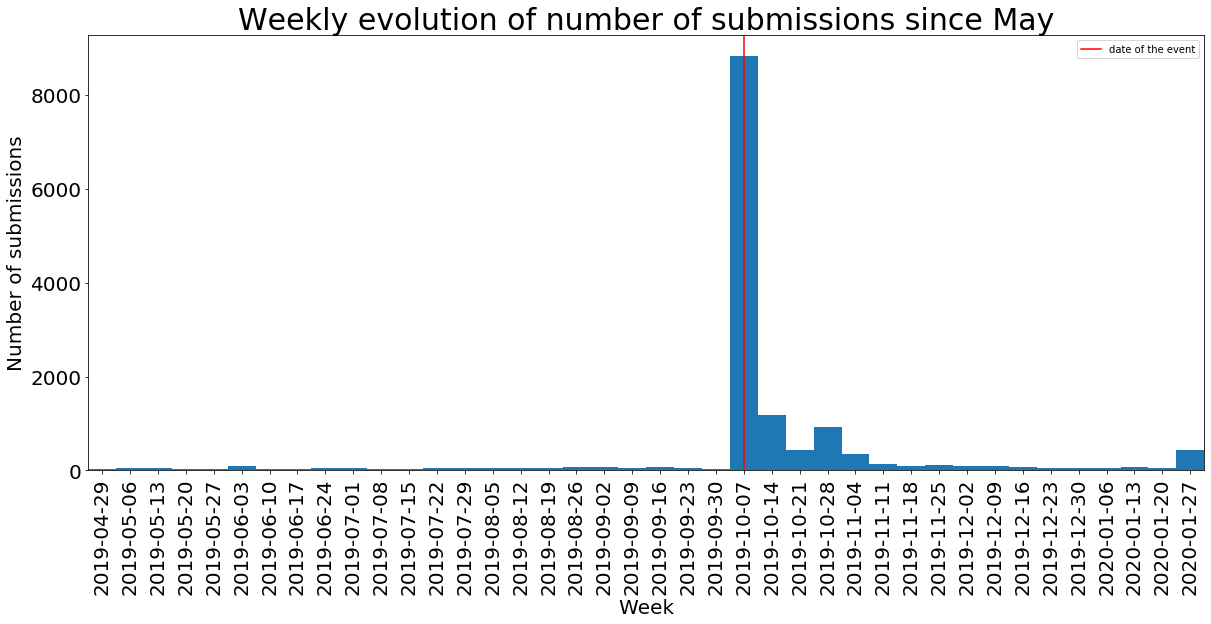

In [17]:
# Get the histogram of the number of submissions for the database retrieved

week = data.groupby(pd.Grouper(key='datetime', freq='W-MON', closed = 'left', label='left'))['date'].count().index
week_sub = data.groupby(pd.Grouper(key='datetime', freq='W-MON', closed = 'left', label='left'))['date'].count().values

fig = plt.figure(figsize=(20,8))
plt.bar(week, week_sub, width = 1)
plt.title('Weekly evolution of number of submissions since May',fontsize=30)
plt.xlabel("Week", fontsize=20)
plt.axvline(x='2019-10-07',color = 'r',label = 'date of the event')
plt.legend()
plt.xticks(week, rotation='vertical')
plt.ylabel('Number of submissions', fontsize=20)
plt.tick_params(labelsize=20)

plt.margins(x = 0, tight = True)

### b) Number of comments

### 1) Large view

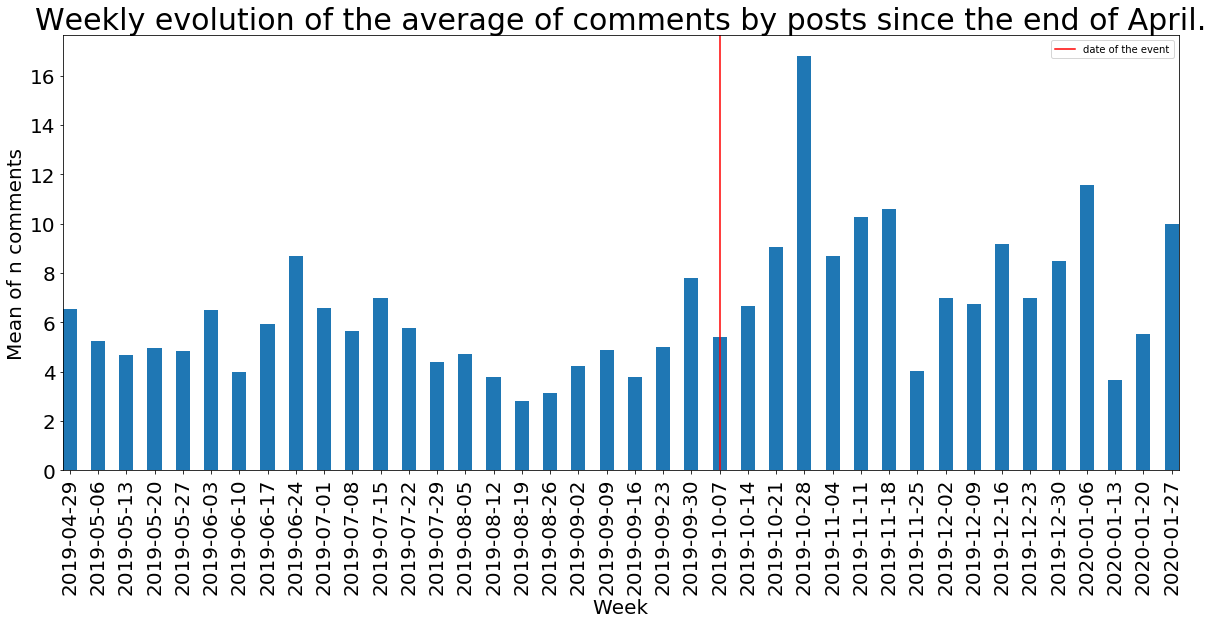

In [18]:
# Get the histogram of the number of comments

data['num_comments'] = data.num_comments.astype(float)

week = data.groupby(pd.Grouper(key='datetime', freq='W-MON', closed = 'left', 
                                       label='left'))['num_comments'].mean().index

week_sub = data.groupby(pd.Grouper(key='datetime', freq='W-MON', closed = 'left', 
                                           label='left'))['num_comments'].mean().values

fig = plt.figure(figsize=(20,8))
plt.bar(week, week_sub, width = 3.5)
plt.title('Weekly evolution of the average of comments by posts since the end of April.',fontsize=30)
plt.axvline(x='2019-10-07',color = 'r',label = 'date of the event')
plt.legend()
plt.xlabel("Week", fontsize=20)
plt.xticks(week, rotation='vertical')
plt.ylabel('Mean of n comments', fontsize=20)
plt.tick_params(labelsize=20)
plt.margins(x = 0, tight = True)

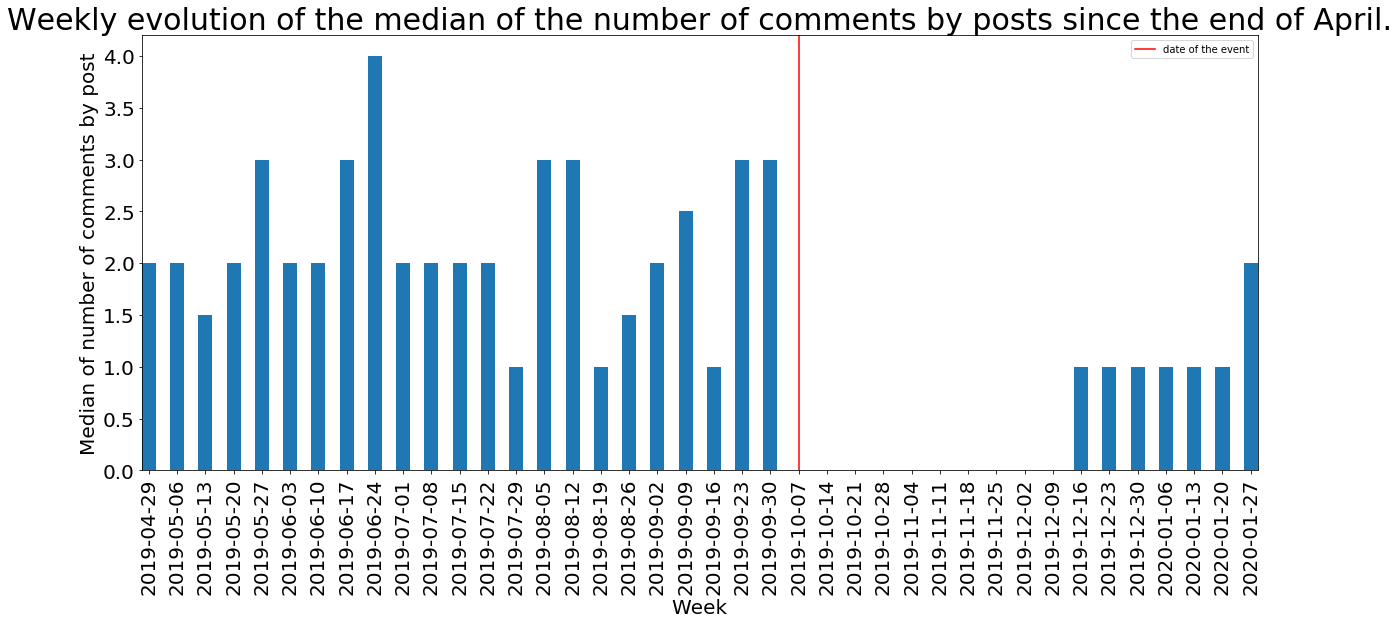

In [19]:
# median comments
data['num_comments'] = data.num_comments.astype(float)

week = data.groupby(pd.Grouper(key='datetime', freq='W-MON', closed = 'left', 
                                       label='left'))['num_comments'].median().index

week_sub = data.groupby(pd.Grouper(key='datetime', freq='W-MON', closed = 'left', 
                                           label='left'))['num_comments'].median().values

fig = plt.figure(figsize=(20,8))
plt.bar(week, week_sub, width = 3.5)
plt.xlabel("Week", fontsize=20)
plt.axvline(x='2019-10-07',color = 'r',label = 'date of the event')
plt.legend()
plt.xticks(week, rotation='vertical')
plt.title('Weekly evolution of the median of the number of comments by posts since the end of April.',fontsize=30)
plt.ylabel('Median of number of comments by post', fontsize=20)
plt.tick_params(labelsize=20)
plt.margins(x = 0, tight = True)

### 2) view with dates that are closer to the event

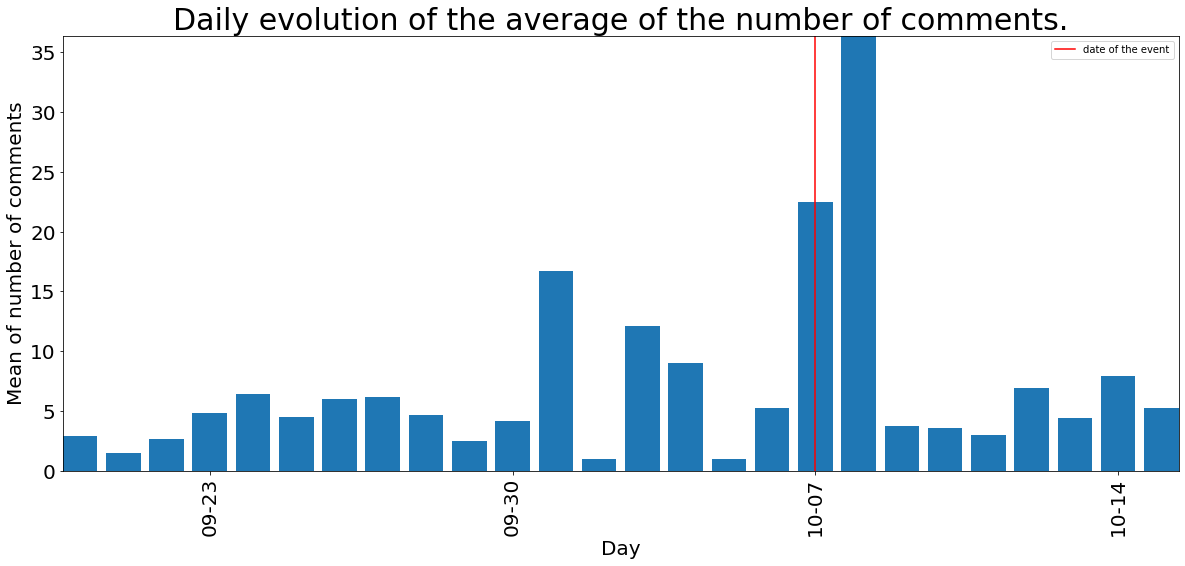

In [20]:
# Get the histogram of the number of comments
df_near_cris['num_comments'] = df_near_cris.num_comments.astype(float)

day = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                       label='left'))['date'].count().index

day_sub = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                           label='left'))['num_comments'].mean().values

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)
plt.bar(day, day_sub)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
plt.title('Daily evolution of the average of the number of comments.',fontsize=30)
plt.xlabel("Day", fontsize=20)
plt.axvline(x='2019-10-07',color = 'r',label = 'date of the event')
plt.legend()
plt.xticks(week, rotation='vertical')
plt.ylabel('Mean of number of comments', fontsize=20)
plt.tick_params(labelsize=20)
plt.margins(x = 0,y=0, tight = True)

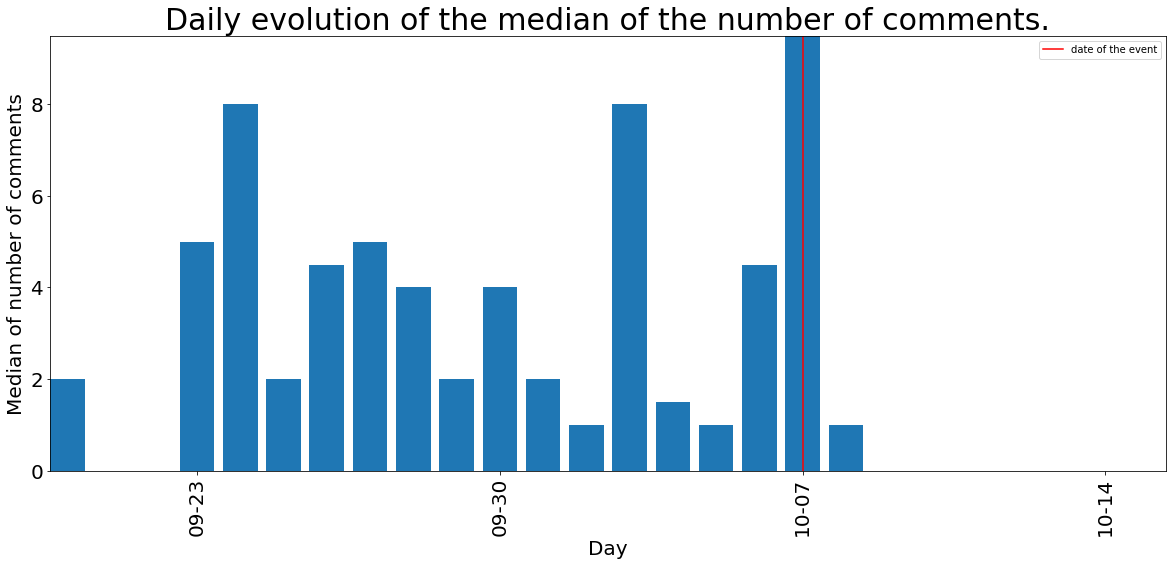

In [21]:
# Get the histogram of the number of comments
df_near_cris['num_comments'] = df_near_cris.num_comments.astype(float)

day2 = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                       label='left'))['date'].count().index

day_sub2 = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                           label='left'))['num_comments'].median().values

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)
plt.bar(day2, day_sub2)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
plt.title('Daily evolution of the median of the number of comments.',fontsize=30)
plt.xlabel("Day", fontsize=20)
plt.axvline(x='2019-10-07',color = 'r',label = 'date of the event')
plt.legend()
plt.xticks(week, rotation='vertical')
plt.ylabel('Median of number of comments', fontsize=20)
plt.tick_params(labelsize=20)
plt.margins(x = 0,y=0, tight = True)

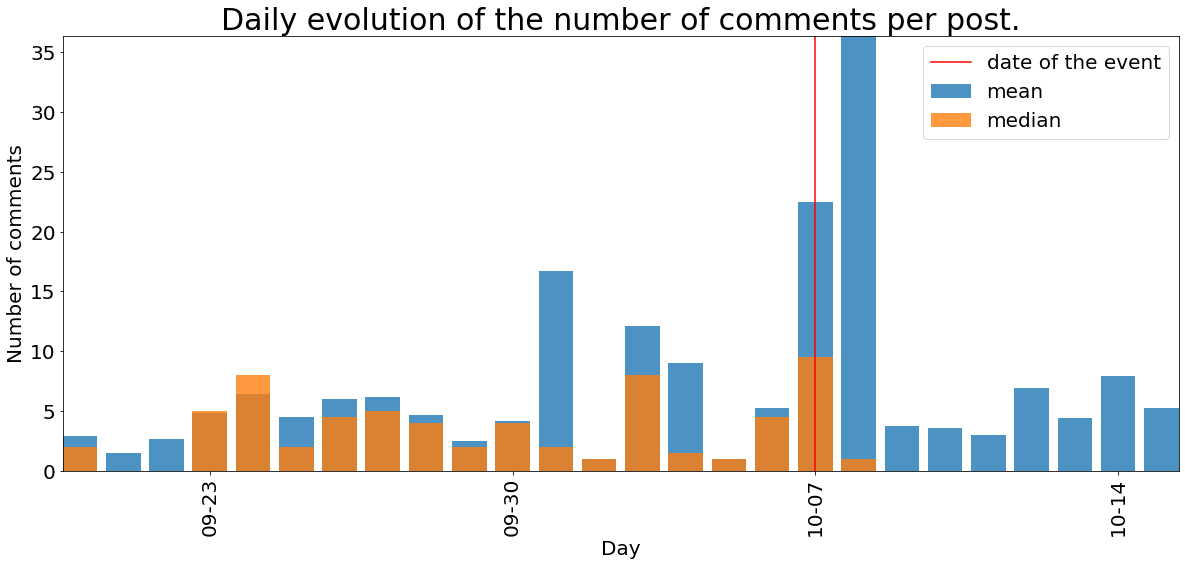

In [22]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)
plt.bar(day, day_sub,alpha=0.8,label = 'mean')
plt.bar(day2, day_sub2,alpha=0.8,label = 'median')
plt.axvline(x='2019-10-07',color = 'r',label = 'date of the event')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
plt.title('Daily evolution of the number of comments per post.',fontsize=30)
plt.xlabel("Day", fontsize=20)
plt.xticks(week, rotation='vertical')
plt.ylabel('Number of comments', fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.margins(x = 0,y=0, tight = True)

## 3) Length of the posts

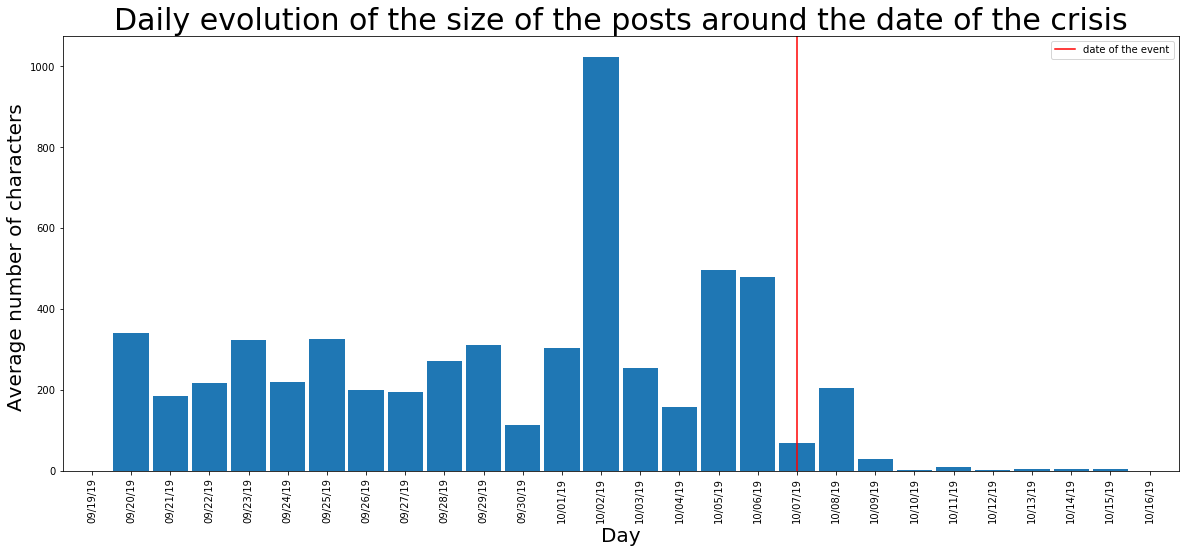

In [23]:
# len of the text near the crisis
length_post = [len(df_near_cris.loc[i]['selftext']) for i in range(len(df_near_cris))]
df_near_cris['len_texts'] = length_post
day = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                      label='left'))['len_texts'].mean().index

val_day = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                          label='left'))['len_texts'].mean().values


fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)  
ax.set_title('Daily evolution of the size of the posts around the date of the crisis', fontsize =30)
plt.bar( day, val_day, width = 0.9)
plt.axvline(x='2019-10-07',color = 'r',label = 'date of the event')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D')) 
plt.xlabel("Day", fontsize=20)
plt.legend()
plt.xticks( rotation='vertical')
plt.ylabel('Average number of characters ', fontsize=20)
plt.show()

## 4) Score evolution

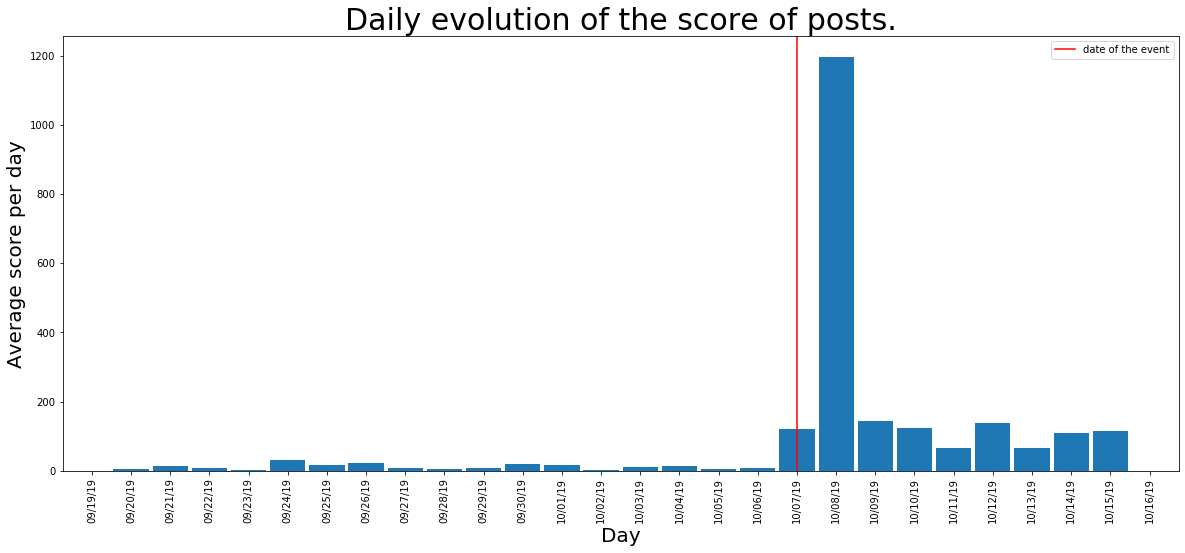

In [24]:
df_near_cris['score'] = df_near_cris.score.astype(float)

day = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                      label='left'))['score'].mean().index

val_day = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                          label='left'))['score'].mean().values


fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)  
plt.bar( day, val_day, width = 0.9)
plt.axvline(x='2019-10-07',color = 'r',label = 'date of the event')
plt.legend()
ax.set_title('Daily evolution of the score of posts.',fontsize=30)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D')) 
plt.xlabel("Day", fontsize=20)

plt.xticks( rotation='vertical')
plt.ylabel('Average score per day', fontsize=20)
plt.show()

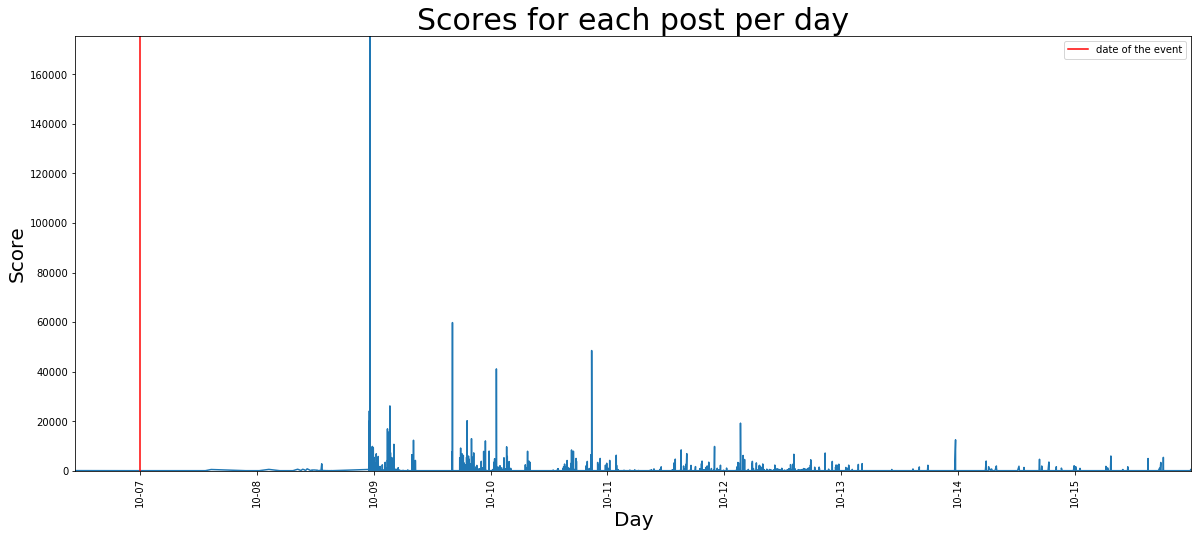

In [25]:

df_near_cris2['score'] = df_near_cris2.score.astype(float)


fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot(1,1,1)  
ax.set_title('Scores for each post per day', fontsize = 30)
plt.plot( df_near_cris2['datetime'], df_near_cris2['score'] )
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  
plt.axvline(x='2019-10-07',color = 'r',label = 'date of the event')
plt.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
plt.xlabel("Day", fontsize=20)
plt.xticks( rotation='vertical')
plt.ylabel('Score', fontsize=20)
plt.margins(x = 0,y=0, tight = True)

## 5) Removed submissions and the correlation with title-only posts

### a) Removed posts

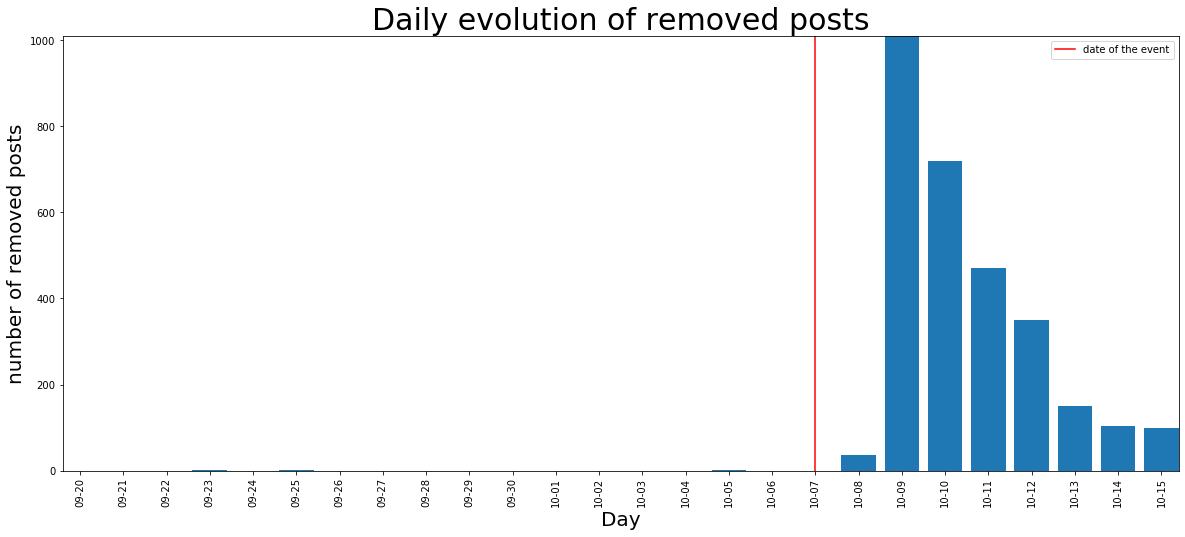

In [26]:

df_near_cris['text_removed'] = df_near_cris['selftext'] == '[removed]'

day_rm = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                      label='left'))['text_removed'].sum().index

val_day_rm = df_near_cris.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                          label='left'))['text_removed'].sum().values

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)  
plt.bar(day_rm, val_day_rm)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
ax.set_title('Daily evolution of removed posts', fontsize=30)
plt.xlabel("Day", fontsize=20)
plt.axvline(x='2019-10-07',color = 'r',label = 'date of the event')
plt.legend()
plt.xticks( rotation='vertical')
plt.ylabel('number of removed posts', fontsize=20)
plt.margins(x = 0,y=0, tight = True)

### b) Posts with just a title

#### NB : because of the megathread to contain the number of submissions, we observed that some user posted posts with just a title and an image, and no text. This is a way of overcoming the deletion of posts are image are less easy to analyse than text on a large scale. 

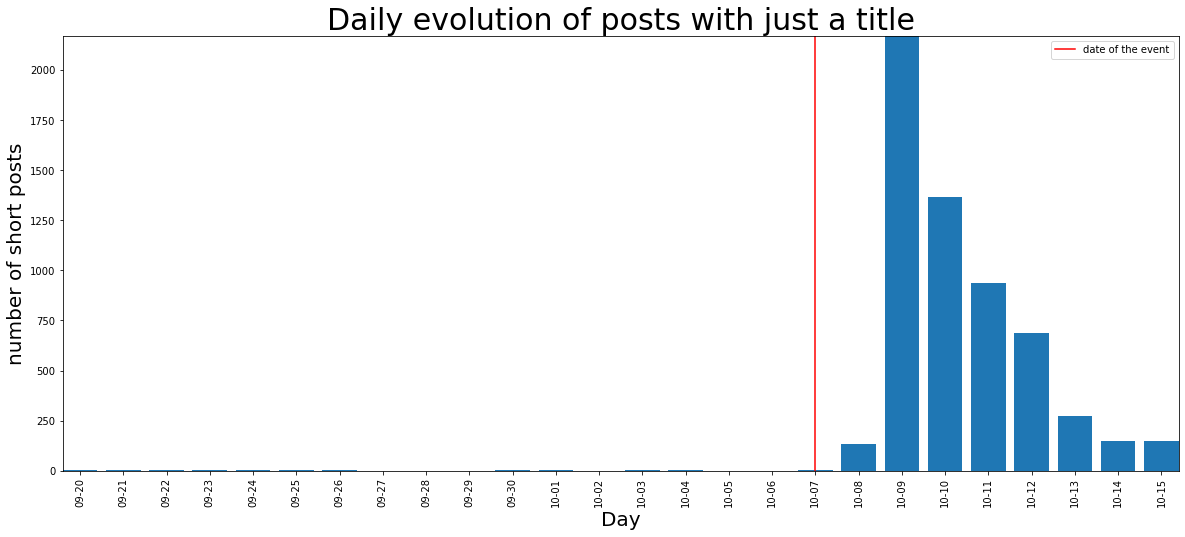

In [27]:
short_posts = df_near_cris[df_near_cris['len_texts'] ==0].copy()
short_posts = short_posts.reset_index()

day_im = short_posts.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                      label='left'))['date'].count().index

val_day_im = short_posts.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                          label='left'))['date'].count().values

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)  
plt.bar(day_im, val_day_im)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
ax.set_title('Daily evolution of posts with just a title', fontsize=30)
plt.xlabel("Day", fontsize=20)
plt.xticks( rotation='vertical')
plt.axvline(x='2019-10-07',color = 'r',label = 'date of the event')
plt.legend()
plt.ylabel('number of short posts', fontsize=20)
plt.margins(x = 0,y=0, tight = True)

#### Here we can see a post of an image for sure. It has no self text.

In [28]:
print('Title of the post : ')
print('')
print( '" '  +str(short_posts['title'][2])+ ' "' )
print('')
print('Text of the post : '+ '" '  +str(short_posts['selftext'][2])+ '"' )


Title of the post : 

" Got it! 30 hours of working and here we are. Its my first illustration, but i will do more and more. Lets take a rest and go fishing😊👌 "

Text of the post : " "


### c) Correlation between number of removed posts and posts with just a title

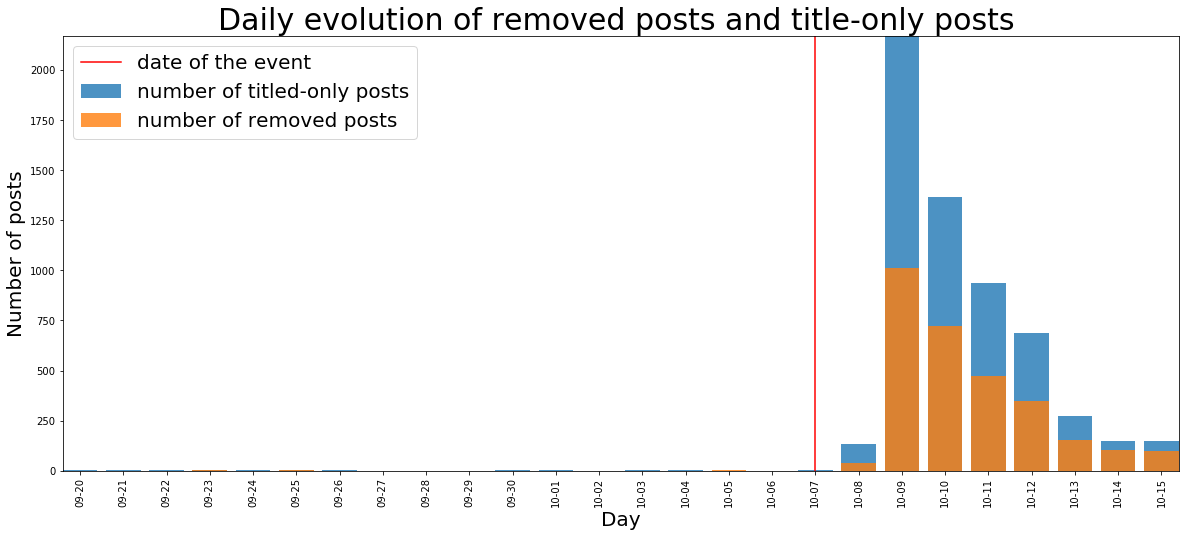

In [29]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)  
plt.bar(day_im, val_day_im,label = 'number of titled-only posts',alpha=0.8)
plt.bar(day_rm, val_day_rm,label = 'number of removed posts',alpha=0.8)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
ax.set_title('Daily evolution of removed posts and title-only posts ', fontsize=30)
plt.xlabel("Day", fontsize=20)
plt.axvline(x='2019-10-07',color = 'r',label = 'date of the event')

plt.xticks( rotation='vertical')
plt.ylabel('Number of posts', fontsize=20)
plt.legend(fontsize=20)
plt.margins(x = 0,y=0, tight = True)

# 6) Opinion Analysis

In [30]:
post_max_title = df_near_cris[df_near_cris['title_score'] == min(df_near_cris['title_score'])]
post_max_title['title']

2806    Kill yourselfz blizzard
Name: title, dtype: object

In [31]:
post_min_title = df_near_cris[df_near_cris['title_score'] == max(df_near_cris['title_score'])]
post_min_title['title']

7164    Not Mei, but Winston :O
Name: title, dtype: object

In [32]:
post_av_title = df_near_cris[df_near_cris['title_score'] < 0.7 ]
post_av_title = post_av_title[post_av_title['title_score'] > 0.4 ]
i = np.random.randint(len(post_av_title))
print(post_av_title.iloc[i]['title'])
print(post_av_title.iloc[i]['selftext'])
print(post_av_title.iloc[i]['full_link'])
print(post_av_title.iloc[i]['title_score'])

We may not live in HK, but we can still make our voices heard

https://www.reddit.com/r/Blizzard/comments/dgbfki/we_may_not_live_in_hk_but_we_can_still_make_our/
0.5


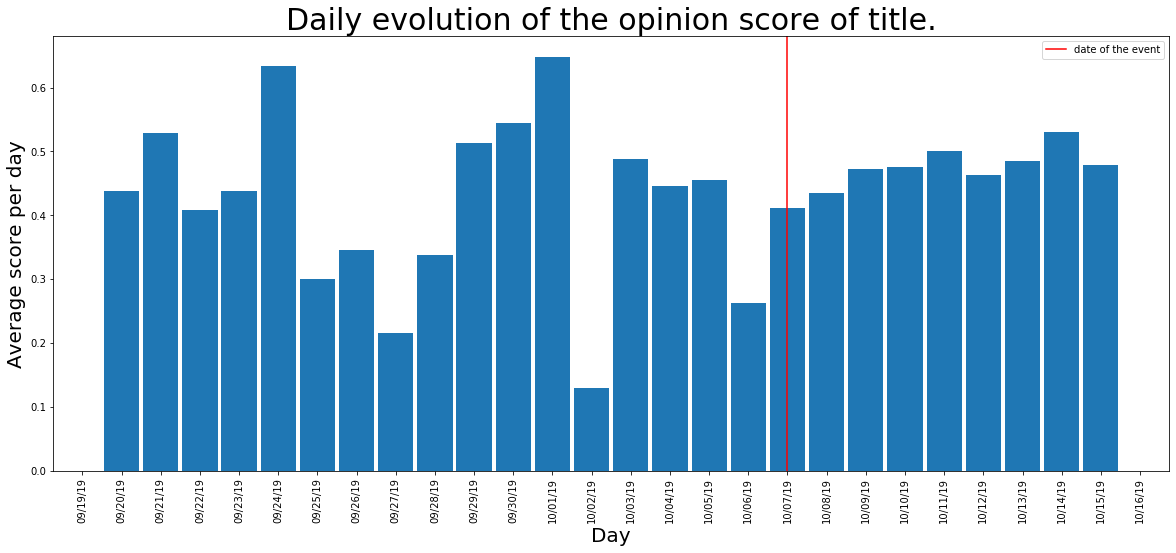

In [33]:
df_removed_empty = df_near_cris[df_near_cris['title_score'] >0]
df_removed_empty['title_score'] = df_near_cris.title_score.astype(float)

day = df_removed_empty.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                      label='left'))['title_score'].mean().index

val_day = df_removed_empty.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                          label='left'))['title_score'].mean().values


fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)  
plt.bar( day, val_day, width = 0.9)
plt.axvline(x='2019-10-07',color = 'r',label = 'date of the event')
plt.legend()
ax.set_title('Daily evolution of the opinion score of title.',fontsize=30)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D')) 
plt.xlabel("Day", fontsize=20)

plt.xticks( rotation='vertical')
plt.ylabel('Average score per day', fontsize=20)
plt.show()

Text(0, 0.5, 'Average score per day')

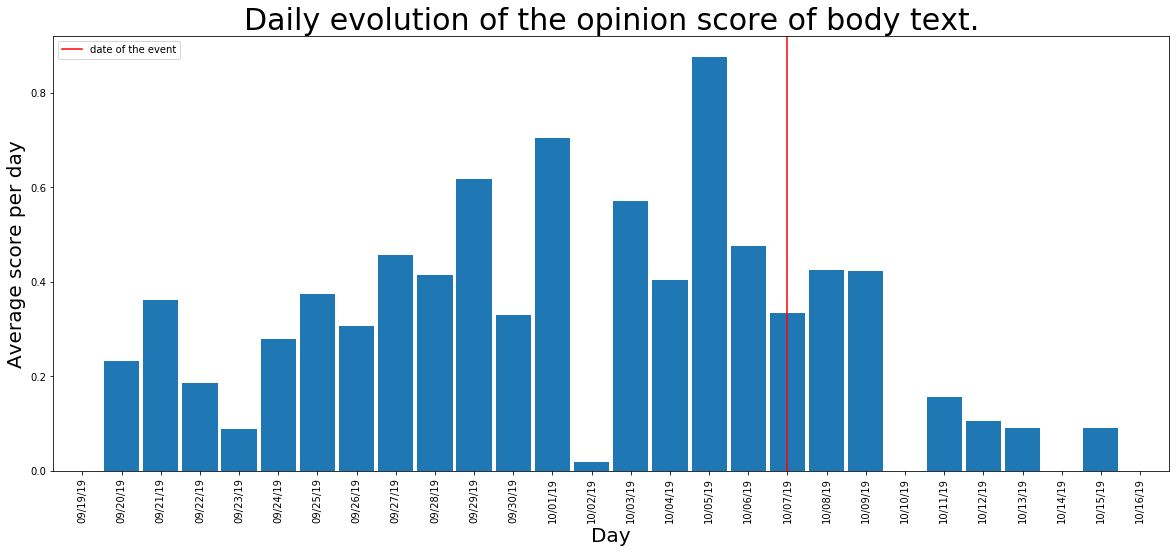

In [34]:
df_removed_empty = df_near_cris[df_near_cris['text_score'] >0].copy()
df_removed_empty['text_score'] = df_near_cris.text_score.astype(float)

day = df_removed_empty.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                      label='left'))['text_score'].mean().index

val_day = df_removed_empty.groupby(pd.Grouper(key='datetime', freq='D', closed = 'left', 
                                          label='left'))['text_score'].mean().values


fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)  
plt.bar( day, val_day, width = 0.9)
plt.axvline(x='2019-10-07',color = 'r',label = 'date of the event')
plt.legend()
ax.set_title('Daily evolution of the opinion score of body text.',fontsize=30)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D')) 
plt.xlabel("Day", fontsize=20)

plt.xticks( rotation='vertical')
plt.ylabel('Average score per day', fontsize=20)

### Before and after event opinion distribution

In [35]:
# before the crisis. 
be_title_score = []
be_text_score = []
be_score_tl = []
be_score_te = []
for i in range(len(df_bef_cris)) : 
    
    if df_bef_cris.iloc[i]['title_score'] > 0 :
        be_score_tl.append(df_bef_cris.iloc[i]['score'])
        be_title_score.append(df_bef_cris.iloc[i]['title_score'])
    
    
    if df_bef_cris.iloc[i]['text_score'] > 0 :
        be_score_te.append(df_bef_cris.iloc[i]['score'])
        be_text_score.append(df_bef_cris.iloc[i]['text_score'])

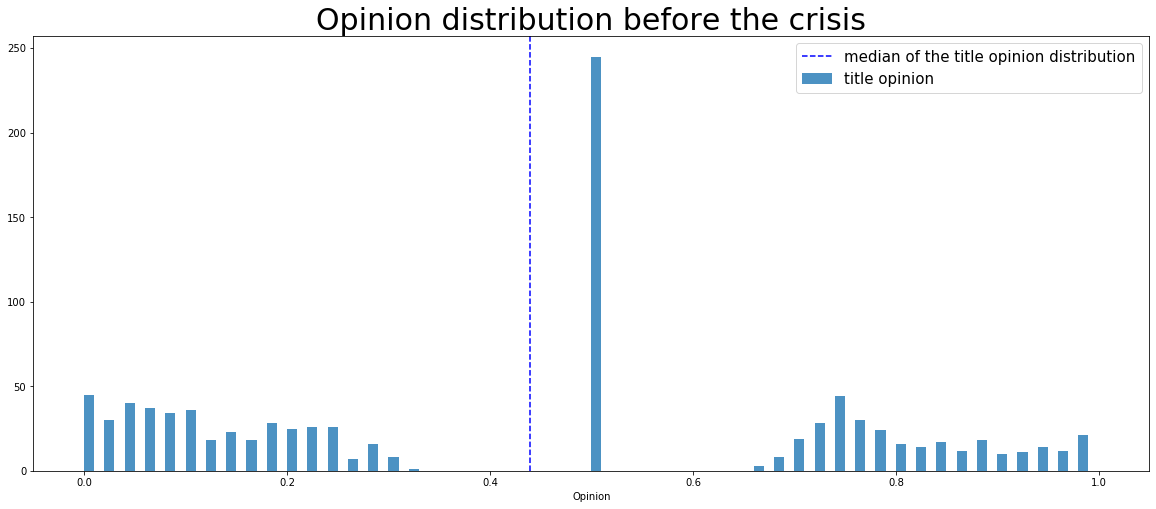

In [36]:
fig = plt.figure(figsize=(20,8))
num_bins = 50
plt.hist(be_title_score, num_bins,width = 0.01,alpha = 0.8,label = 'title opinion')

plt.title('Opinion distribution before the crisis',fontsize = 30)
plt.axvline(x=np.mean(be_title_score),linestyle = '--',label = 'median of the title opinion distribution',color = 'b')
plt.legend(fontsize = 15)
plt.xlabel('Opinion')
plt.show()


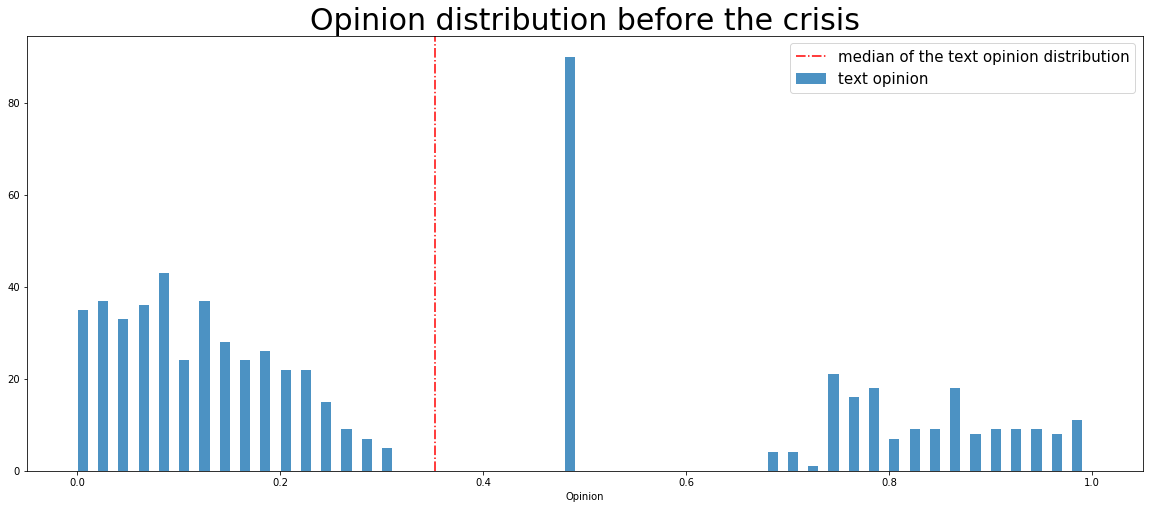

In [37]:
fig = plt.figure(figsize=(20,8))
num_bins = 50

plt.hist(be_text_score, num_bins,width = 0.01,alpha = 0.8,label = 'text opinion')
plt.title('Opinion distribution before the crisis',fontsize = 30)
plt.axvline(x=np.mean(be_text_score),linestyle = '-.',label = 'median of the text opinion distribution',color = 'r')
plt.legend(fontsize = 15)
plt.xlabel('Opinion')
plt.show()

In [38]:
print(np.std(be_title_score))
print(np.std(be_text_score))

0.3063605914616143
0.3171122495629967


In [39]:
# after the crisis. 
aft_title_score = []
aft_text_score = []
aft_score_tl = []
aft_score_te = []
for i in range(len(df_aft_cris)) : 
    
    if df_aft_cris.iloc[i]['title_score'] > 0 :
        aft_score_tl.append(df_aft_cris.iloc[i]['score'])
        aft_title_score.append(df_aft_cris.iloc[i]['title_score'])
    
    
    if df_aft_cris.iloc[i]['text_score'] > 0 :
        aft_score_te.append(df_aft_cris.iloc[i]['score'])
        aft_text_score.append(df_aft_cris.iloc[i]['text_score'])

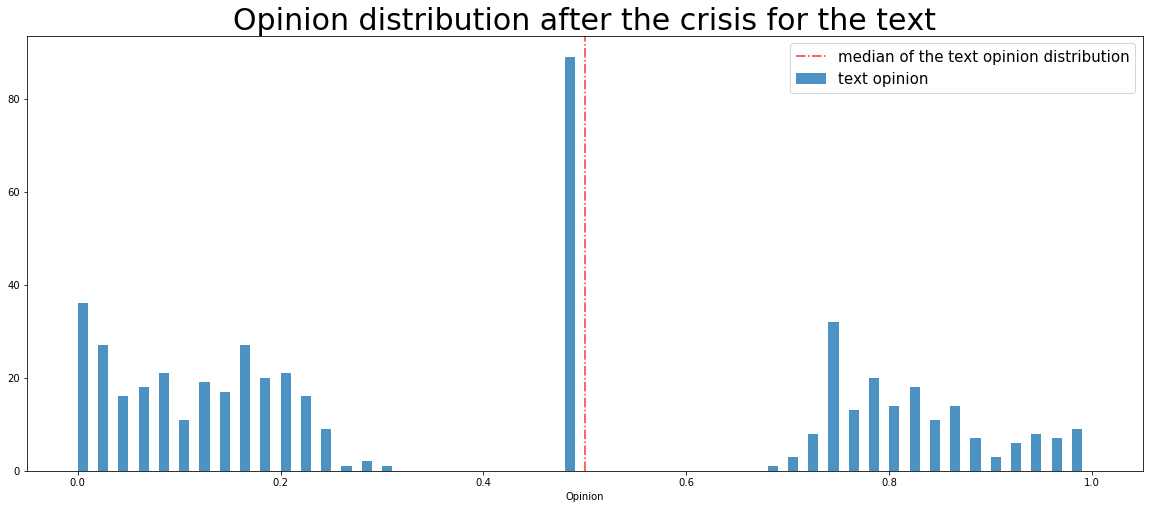

In [40]:
fig = plt.figure(figsize=(20,8))
num_bins = 50
plt.hist(aft_text_score, num_bins,width = 0.01,alpha = 0.8,label = 'text opinion')

plt.title('Opinion distribution after the crisis for the text',fontsize = 30)
plt.axvline(np.median(aft_text_score),linestyle = '-.',label = 'median of the text opinion distribution',color = 'r',alpha = 0.8)
plt.legend(fontsize = 15)
plt.xlabel('Opinion')
plt.show()

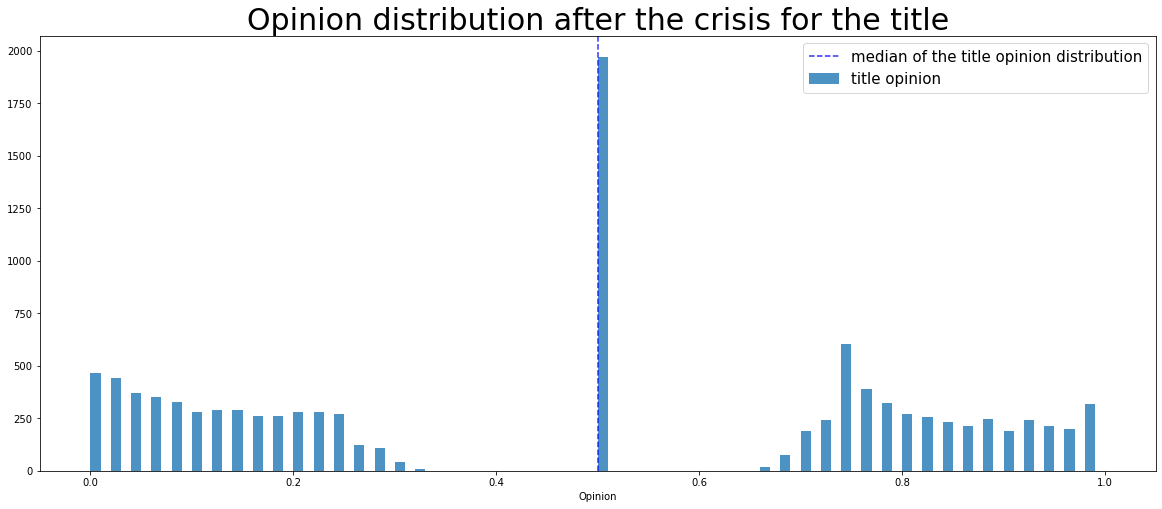

In [41]:
fig = plt.figure(figsize=(20,8))
num_bins = 50

plt.hist(aft_title_score, num_bins,width = 0.01,alpha = 0.8,label = 'title opinion')
plt.title('Opinion distribution after the crisis for the title',fontsize = 30)
plt.axvline(np.median(aft_title_score),linestyle = '--',label = 'median of the title opinion distribution',color = 'b',alpha = 0.8)
plt.legend(fontsize = 15)
plt.xlabel('Opinion')
plt.show()

In [42]:
print(np.std(aft_title_score))
print(np.std(aft_text_score))

0.3293051659379434
0.32726859251447693


## Correlation between score and opinion

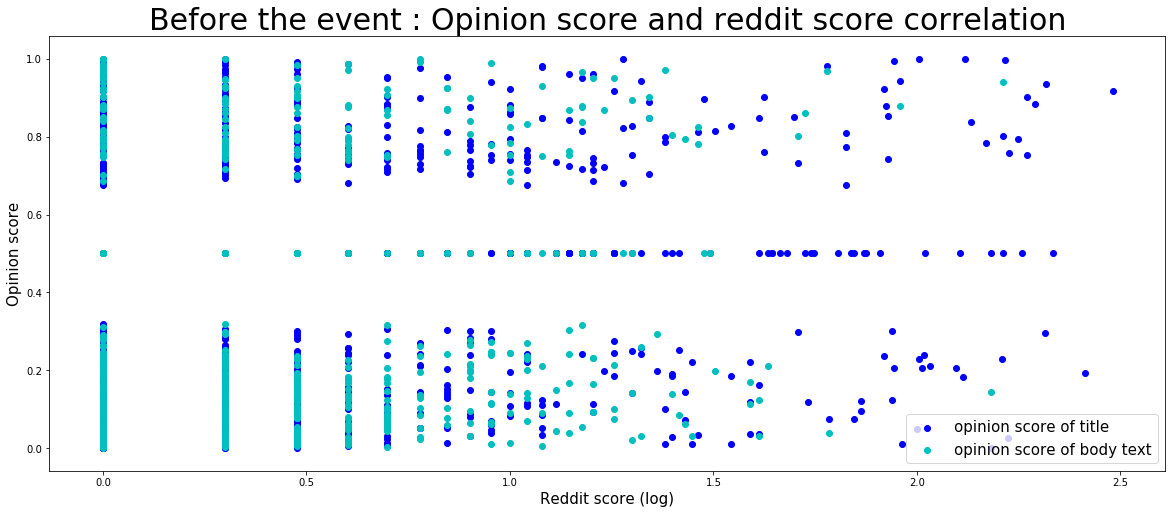

In [43]:
norm_tl = np.log10(np.array(be_score_tl)+np.ones(len(be_score_tl)))
norm_te = np.log10(np.array(be_score_te)+np.ones(len(be_score_te)))
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1) 
plt.scatter(norm_tl,be_title_score,color = 'b',label='opinion score of title')
plt.scatter(norm_te,be_text_score,color = 'c',label='opinion score of body text')
plt.title('Before the event : Opinion score and reddit score correlation',fontsize = 30)
plt.legend(fontsize = 15)
plt.ylabel('Opinion score',fontsize = 15)
plt.xlabel('Reddit score (log)',fontsize = 15)
plt.show()

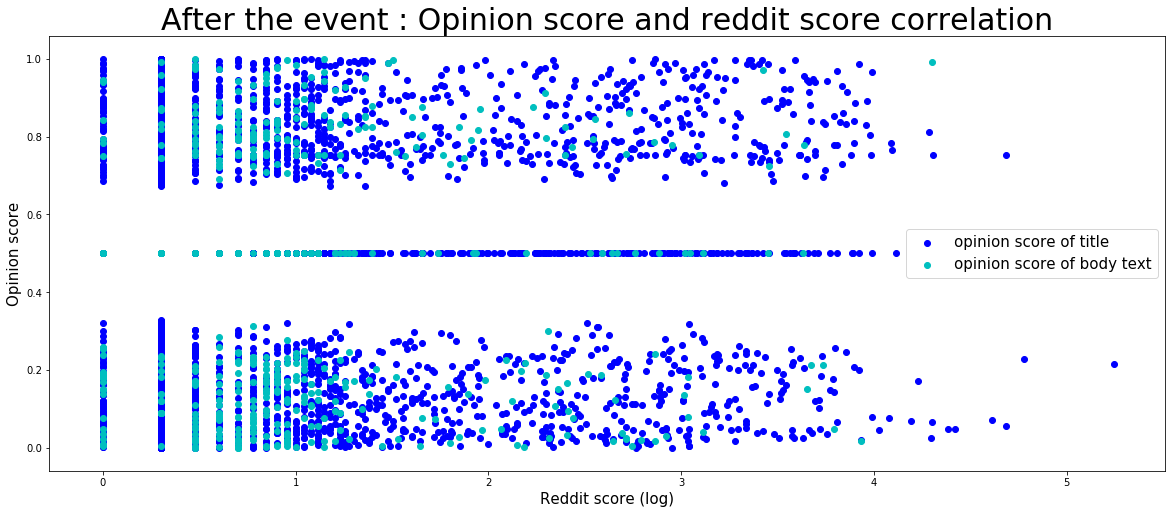

In [44]:
norm_tl = np.log10(np.array(aft_score_tl)+np.ones(len(aft_score_tl)))
norm_te = np.log10(np.array(aft_score_te)+np.ones(len(aft_score_te)))
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1) 
plt.scatter(norm_tl,aft_title_score,color = 'b',label='opinion score of title')
plt.scatter(norm_te,aft_text_score,color = 'c',label='opinion score of body text')
plt.title('After the event : Opinion score and reddit score correlation',fontsize = 30)
plt.legend(fontsize = 15)
plt.ylabel('Opinion score',fontsize = 15)
plt.xlabel('Reddit score (log)',fontsize = 15)
plt.show()